# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

MessageError: ignored

In [ ]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = '/content/drive/MyDrive/Ensemble/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [ ]:
train.head()

In [147]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [148]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


# 데이터 전처리


In [149]:
train.shape

(8101, 20)

In [150]:
test.shape

(2026, 19)

In [151]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [152]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

([<matplotlib.patches.Wedge at 0x7f65f12c7a90>,
 [Text(-0.9627347327788207, 0.5321107349991099, '0'),
  Text(0.962734757688721, -0.5321106899302436, '1')])

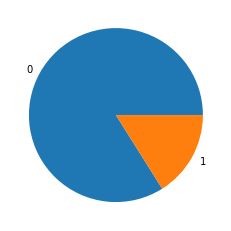

In [153]:
# Train Data 에서 Target label 분포
target_label_count = train['Attrition_Flag'].value_counts()
plt.pie(target_label_count, labels = target_label_count.index)

#Data의 0 비율이 훨씬 높다. -> 비율 조정 필요

In [154]:
train.describe(include='all')

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,8101.000000,8101,8101.000000,8101,8101,8101,8101,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
unique,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4286,NaN,2535,3749,2848,7546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,46.291199,NaN,2.339958,NaN,NaN,NaN,NaN,35.905938,3.808172,2.347241,2.460931,8667.346587,1157.653746,7509.692840,0.760068,4444.729663,64.984199,0.711699,0.274665,0.160721
std,8.040300,NaN,1.300795,NaN,NaN,NaN,NaN,8.011260,1.553566,1.013624,1.098309,9127.897938,815.062550,9129.855775,0.218224,3448.702344,23.608677,0.235800,0.277166,0.367296
min,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,563.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2557.000000,289.000000,1316.000000,0.631000,2169.000000,45.000000,0.583000,0.020000,0.000000
50%,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1273.000000,3508.000000,0.737000,3904.000000,67.000000,0.700000,0.173000,0.000000
75%,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11135.000000,1781.000000,9930.000000,0.859000,4754.000000,81.000000,0.818000,0.504000,0.000000


In [155]:
train.info() #Gender, Income_Category, Card_Category, Marital_Status, Education_Level는 범주형 데이터이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Am

In [156]:
for value in train:
    print("================================")
    print(value)
    print("================================")
    print(train[value].value_counts())

Customer_Age
44    400
45    399
49    388
47    386
48    381
46    380
43    366
50    363
42    339
51    321
41    303
52    302
53    295
40    290
39    271
54    255
38    239
55    217
37    214
56    197
36    183
57    179
35    154
58    132
59    132
34    115
60    102
33    101
32     83
62     79
65     78
61     74
31     72
26     64
30     56
63     52
29     49
64     33
27     26
28     24
66      2
68      2
73      1
67      1
70      1
Name: Customer_Age, dtype: int64
Gender
F    4286
M    3815
Name: Gender, dtype: int64
Dependent_count
3    2206
2    2089
1    1491
4    1246
0     732
5     337
Name: Dependent_count, dtype: int64
Education_Level
Graduate         2535
High School      1609
Unknown          1220
Uneducated       1158
College           807
Post-Graduate     409
Doctorate         363
Name: Education_Level, dtype: int64
Marital_Status
Married     3749
Single      3155
Divorced     613
Unknown      584
Name: Marital_Status, dtype: int64
Income_Categor

- Education_Level, Marital_Status, Income_Category 여기서 Unknown으로 표시된 값들은 null값으로 바꿔준다. 

In [157]:
train.replace({'Education_Level': 'Unknown'}, {'Education_Level': np.nan}, inplace=True)
train.replace({'Marital_Status': 'Unknown'}, {'Marital_Status': np.nan}, inplace=True)
train.replace({'Income_Category': 'Unknown'}, {'Income_Category': np.nan}, inplace=True)


In [158]:
# train = train.dropna()
train.isna().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1220
Marital_Status               584
Income_Category              887
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Attrition_Flag                 0
dtype: int64

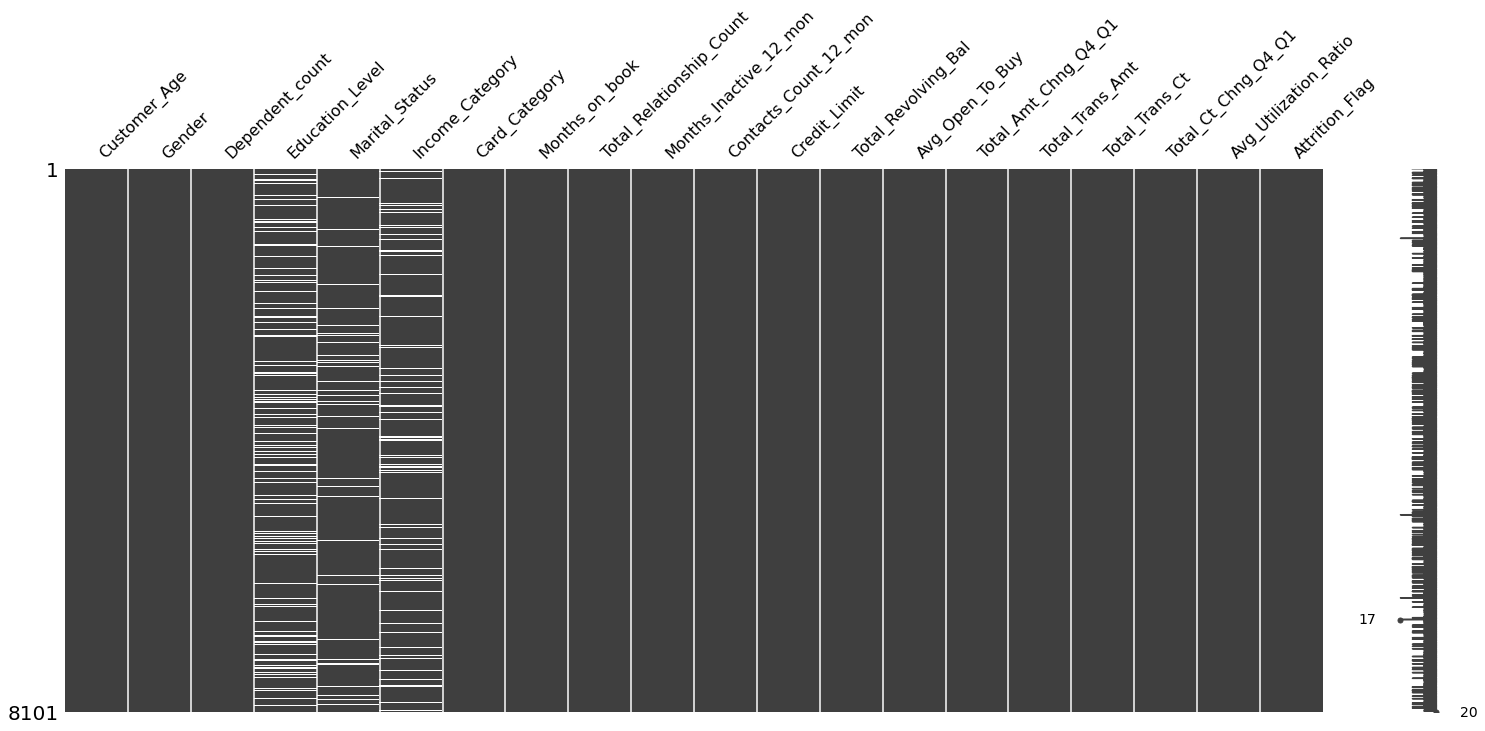

In [159]:
import missingno as msno

msno.matrix(train)


In [160]:
# Marital_Status , Income_Category의 결측값 행은 버린다.

train = train.dropna(subset=['Marital_Status', 'Income_Category', 'Education_Level'])
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [161]:
pip install xgboost

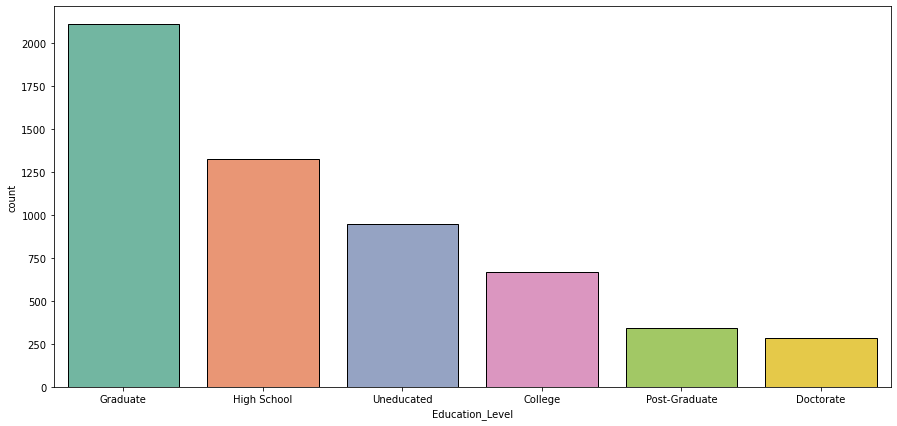

In [162]:
# Education Level에 대한 결측치 채우기
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Education_Level'

value_counts = train[col].value_counts()
sns.countplot(x=col, data=train, palette='Set2', edgecolor='black', order=value_counts.index)

In [163]:
# train['Education_Level'] = train['Education_Level'].fillna(2)

In [164]:
train_data = train.copy()
test_data = test.copy()

In [165]:
def gender_num(x):
  if x == 'M':
    return 0
  elif x == 'F':
    return 1

In [166]:
train_data['gender_num'] = train_data.Gender.apply(gender_num).astype('int64')
train_data = train_data.drop(columns=['Gender'], axis=1)

In [167]:
def education_level_num(x):
  if x == 'High School':
    return 0
  elif x == 'College':
    return 1
  elif x == 'Graduate':
    return 2
  elif x == 'Post-Graduate':
    return 3
  elif x == 'Doctorate':
    return 4

In [168]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [169]:
# !pip3 install torch

In [170]:
train_data['education_level_num'] = train_data.Education_Level.apply(education_level_num).astype('int64', errors='ignore')
train_data = train_data.drop(columns=['Education_Level'], axis=1)

In [171]:
def marital_status_num(x):
  if x == 'Single':
    return 0
  elif x == 'Married':
    return 1
  elif x == 'Divorced':
    return 2

In [172]:
train_data['marital_status_num'] = train_data.Marital_Status.apply(marital_status_num).astype('int64')
train_data = train_data.drop(columns=['Marital_Status'], axis=1)

In [173]:
def card_category_num(x):
  if x == 'Blue':
    return 0
  elif x == 'Silver':
    return 1
  elif x == 'Gold':
    return 2
  elif x == 'Platinum':
    return 3

In [174]:
train_data['card_category_num'] = train_data.Card_Category.apply(card_category_num).astype('int64')
train_data = train_data.drop(columns=['Card_Category'], axis=1)


In [175]:
def income_category_num(x):
  if x == 'Less than $40K':
    return 0
  elif x == '$40K - $60K':
    return 1
  elif x == '$60K - $80K':
    return 2
  elif x == '$80K - $120K':
    return 3
  elif x == '	$120K +':
    return 4
  else:
    return 5

In [176]:
train_data['income_category_num'] = train_data.Income_Category.apply(income_category_num).astype('int64')
train_data = train_data.drop(columns=['Income_Category'], axis=1)

In [177]:
train_data.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,gender_num,education_level_num,marital_status_num,card_category_num,income_category_num
1,42,3,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0,0,NaN,0,0,2
2,57,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0,0,NaN,2,0,3
3,26,1,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0,1,2.0,0,0,1
4,38,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0,1,NaN,1,0,0
5,26,0,36,5,2,4,9916.0,0,9916.0,0.793,3477,65,0.667,0.000,0,0,2.0,1,0,0


In [178]:
train_data = train_data[['Customer_Age', 'gender_num', 'Dependent_count', 'education_level_num',
                         'marital_status_num', 'income_category_num', 'card_category_num',
                         'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                         'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                         'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                         'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

In [179]:
train_data.head()


,Customer_Age,gender_num,Dependent_count,education_level_num,marital_status_num,income_category_num,card_category_num,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
1,42,0,3,NaN,0,2,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,0.610,0.156,0
2,57,0,0,NaN,2,3,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,0.861,0.655,0
3,26,1,1,2.0,0,1,0,20,6,3,3,1438.3,673,765.3,0.595,2167,0.412,0.468,0
4,38,1,0,NaN,1,0,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,0.909,0.000,0
5,26,0,0,2.0,1,0,0,36,5,2,4,9916.0,0,9916.0,0.793,3477,0.667,0.000,0


In [180]:
test_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [181]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Model

In [182]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [183]:
X.head()

,Customer_Age,gender_num,Dependent_count,education_level_num,marital_status_num,income_category_num,card_category_num,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,42,0,3,NaN,0,2,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,0.610,0.156
2,57,0,0,NaN,2,3,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,0.861,0.655
3,26,1,1,2.0,0,1,0,20,6,3,3,1438.3,673,765.3,0.595,2167,0.412,0.468
4,38,1,0,NaN,1,0,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,0.909,0.000
5,26,0,0,2.0,1,0,0,36,5,2,4,9916.0,0,9916.0,0.793,3477,0.667,0.000


In [184]:
y.head()

1    0
2    0
3    0
4    0
5    0
Name: Attrition_Flag, dtype: int64

In [185]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [186]:
scores = cross_val_score(XGBClassifier(), X, y, cv=kfold)
print('Accuracy:', np.round(scores, 2))
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.95 0.96 0.95 0.95 0.95]
Accuracy mean: 0.95


In [205]:
def grid_search_xg(params, random=False): 
    xgb = XGBClassifier(random_state=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=50, n_jobs=-1, random_state=2)
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
    
    grid.fit(X, y)

    best_params = grid.best_params_
    print("Best params:", best_params)
    best_score = grid.best_score_
    print(f"Best score: {best_score}")


In [206]:
grid_search_xg(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

Best params: {'learning_rate': 0.3}
Best score: 0.9624532860949895


In [207]:
grid_search_xg(params={'max_depth':[2, 3, 5, 6,7, 8]})

Best params: {'max_depth': 6}
Best score: 0.9619240301765999


In [204]:
grid_search_xg(params={'gamma':[0, 0.01, 0.1,0.3, 0.5, 1, 2]})

Best params: {'gamma': 0.5}
Best score: 0.950290655665105


In [208]:
grid_search_xg(params={'min_child_weight':[1, 2, 3, 4, 5]})

Best params: {'min_child_weight': 2}
Best score: 0.9517008134629281


In [209]:
grid_search_xg(params={'subsample':[0.5,0.6, 0.7, 0.8, 0.9, 1]})

Best params: {'subsample': 0.7}
Best score: 0.9550503849769637


In [210]:
grid_search_xg(params={'colsample_bytree':[0.5,0.6, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 0.9}
Best score: 0.94958534368226


In [214]:
!pip install bayesian_optimization
from bayes_opt import BayesianOptimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=24d072cc78ee6ea9888f100ca8744995590198c2746ba17ebe13d5a9c2077e8f
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [232]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
label = train.Attrition_Flag
regs = []

In [233]:
def lgb_cv(num_leaves, max_depth, learning_rate, min_split_gain, min_child_weight, min_child_samples, subsample, colsample_bytree, reg_alpha, reg_lambda):
  kfold = KFold(n_splits = 3, shuffle = True)
  rmses = []


  for train_idx, val_idx in kfold.split(train_data, label):
    X_train, X_val = train_data.iloc[train_idx], train_data.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]
    regressor = lgb.LGBMRegressor(num_leaves = int(num_leaves),
                                  max_depth = int(max_depth),
                                  learning_rate = learning_rate,
                                  min_split_gain = min_split_gain,
                                  min_child_weight = min_child_weight,
                                  min_child_samples = int(min_child_samples),
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree,
                                  reg_alpha = reg_alpha,
                                  reg_lambda = reg_lambda,
                                  boosting_type = 'gbdt',
                                  n_estimators = 100000,
                                  objective = 'regression',
                                  random_state = 317,
                                  )
    
    regressor.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')

    y_val_pred = regressor.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    rmses.append(rmse)

  return -np.mean(rmse)

p_bounds = {'num_leaves' : (10, 300),
            'max_depth' : (1, 30),
            'learning_rate' : (0.001, 0.1),
            'min_split_gain' : (0, 1),
            'min_child_weight' : (0, 1),
            'min_child_samples' : (5, 50),
            'subsample' : (0.5, 1),
            'colsample_bytree' : (0.5, 1),
            'reg_alpha' : (0, 1),
            'reg_lambda' : (0, 1)}
lgb_bo = BayesianOptimization(f = lgb_cv,  pbounds = p_bounds, verbose = 2)
lgb_bo.maximize(init_points = 30, n_iter = 30)

lgb_bo.max

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -0.04854  |  0.623    |  0.05744  |  20.78    |  13.6     |  0.7388   |  0.2083   |  216.1    |  0.8525   |  0.4395   |  0.6429   |
|  2        | -0.04423  |  0.5452   |  0.02761  |  26.1     |  32.99    |  0.02208  |  0.304    |  147.7    |  0.6454   |  0.4188   |  0.6329   |
|  3        | -0.02871  |  0.6998   |  0.07486  |  14.32    |  8.916    |  0.806    |  0.03242  |  264.9    |  0.02514  |  0.9613   |  0.6487   |
|  4        | -0.05459  |  0.5032   |  0.09492  |  23.78    |  26.09    |  0.9868   |  0.1815   |  11.41    |  0.2747   |  0.09859  |  0.6204   |
|  5        | -0.0136   |  0.9683   |  0.002913 |  24.14    |  24.99    |  0.8757   |  0.2838   |  186.9    |  0.5523   |  0

{'params': {'colsample_bytree': 1.0,
  'learning_rate': 0.1,
  'max_depth': 22.523055078210486,
  'min_child_samples': 17.4895317369111,
  'min_child_weight': 0.0,
  'min_split_gain': 0.0,
  'num_leaves': 269.81762275520913,
  'reg_alpha': 1.0,
  'reg_lambda': 1.0,
  'subsample': 0.5},
 'target': -0.0007080508177771461}

In [234]:
lgbr = lgb.LGBMRegressor(num_leaves = 13,
                              max_depth = 18,
                              learning_rate = 0.002457503047340548,
                              min_split_gain = 0.3333855103986887,
                              min_child_weight = 0.9676197772595285,
                              min_child_samples = 1,
                              subsample = 0.6166543094945032,
                              colsample_bytree = 0.8617120610970266,
                              reg_alpha = 0.07424749780045459,
                              reg_lambda = 0.2277345144578541,
                              boosting_type = 'gbdt',
                              n_estimators = 1000000,
                              objective = 'regression',
                              random_state = 317); regs.append(lgbr)

# 예측

저는 Stacking 사용했지만 17기 분들은 다양한 방식을 활용해서 모델의 성능을 높여주세요!

In [261]:
S_train = np.zeros(shape = (len(train), len(regs)))
S_test = np.zeros(shape = (len(test), len(regs)))
S_train = pd.DataFrame(data = S_train)
S_test = pd.DataFrame(data = S_test)
def final_predict_lgb():
  preds = []
  score = 0
  kfold = KFold(n_splits = 5, shuffle = True)
  for train_idx, val_idx in kfold.split(S_train, label):
    X_train, X_val = S_train.iloc[train_idx], S_train.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]

    reg = lgb.LGBMRegressor(num_leaves = 232,
                             max_depth = 14,
                             learning_rate = 0.06022326786017472,
                             min_split_gain = 0.7423378595068828,
                             min_child_weight = 0.6236475853389748,
                             min_child_samples = 21,
                             subsample = 0.9910466741797161,
                             colsample_bytree = 0.9506738878224221,
                             reg_alpha = 0.11808381799657508,
                             reg_lambda = 0.9499511019371623,
                             boosting_type = 'gbdt',
                             n_estimators = 1000000,
                             objective = 'regression',
                             random_state = 317)
    reg.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')
    val_pred = reg.predict(X_val)
    score += mean_squared_error(y_val, val_pred, squared = False)
    preds.append(reg.predict(S_test))
  print(score / 5)
  print(preds)

  return np.array(preds).mean(axis = 0)

In [262]:
lgb_pred = final_predict_lgb()

0.36368571869852384
[array([0.15711767, 0.15711767, 0.15711767, ..., 0.15711767, 0.15711767,
       0.15711767]), array([0.1557955, 0.1557955, 0.1557955, ..., 0.1557955, 0.1557955,
       0.1557955]), array([0.15799912, 0.15799912, 0.15799912, ..., 0.15799912, 0.15799912,
       0.15799912]), array([0.15752368, 0.15752368, 0.15752368, ..., 0.15752368, 0.15752368,
       0.15752368]), array([0.15598149, 0.15598149, 0.15598149, ..., 0.15598149, 0.15598149,
       0.15598149])]


In [266]:
from sklearn.metrics import accuracy_score
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
lgb_pred_1 = accuracy_score(S_test, lgb_pred.round(), normalize=False)

print(lgb_pred_1)

2026


In [267]:
lgb_pred

array([0.15688349, 0.15688349, 0.15688349, ..., 0.15688349, 0.15688349,
       0.15688349])

In [269]:
submission.iloc[:, 1:] = lgb_pred
submission.to_csv(data_dir + 'your_model.csv', index = False)
submission.head()

ValueError: ignored